In [13]:
#imports
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [14]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [16]:
#Bank of America
BAC = yf.download("BAC", start, end)

# CitiGroup
C = yf.download("C", start, end)

# Goldman Sachs
GS = yf.download("GS", start, end)

# JPMorgan Chase
JPM = yf.download("JPM", start, end)

# Morgan Stanley
MS = yf.download("MS", start, end)

# Wells Fargo
WFC = yf.download("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [18]:
BAC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,32.695656,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,32.348434,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,32.390091,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,32.341476,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,32.362316,15619400


In [21]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
#multi-level column index
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.695656  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.348434  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.390091  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.341476  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.362316  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.310356  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.333889  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.428020  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.463341  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.828148  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.695118  11016400  
2006-01-04   31.530001  19.466673  10870000  
2006-01-05   31.495001  19.445076  10158000  
2006-01-06   31.680000  19.559290   8403800  
2006-01-09   31.674999  19.556190   5619600  

[5 rows x 36 columns]

In [27]:
#What is the max Close price for each bank's stock throughout the time period?
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [30]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


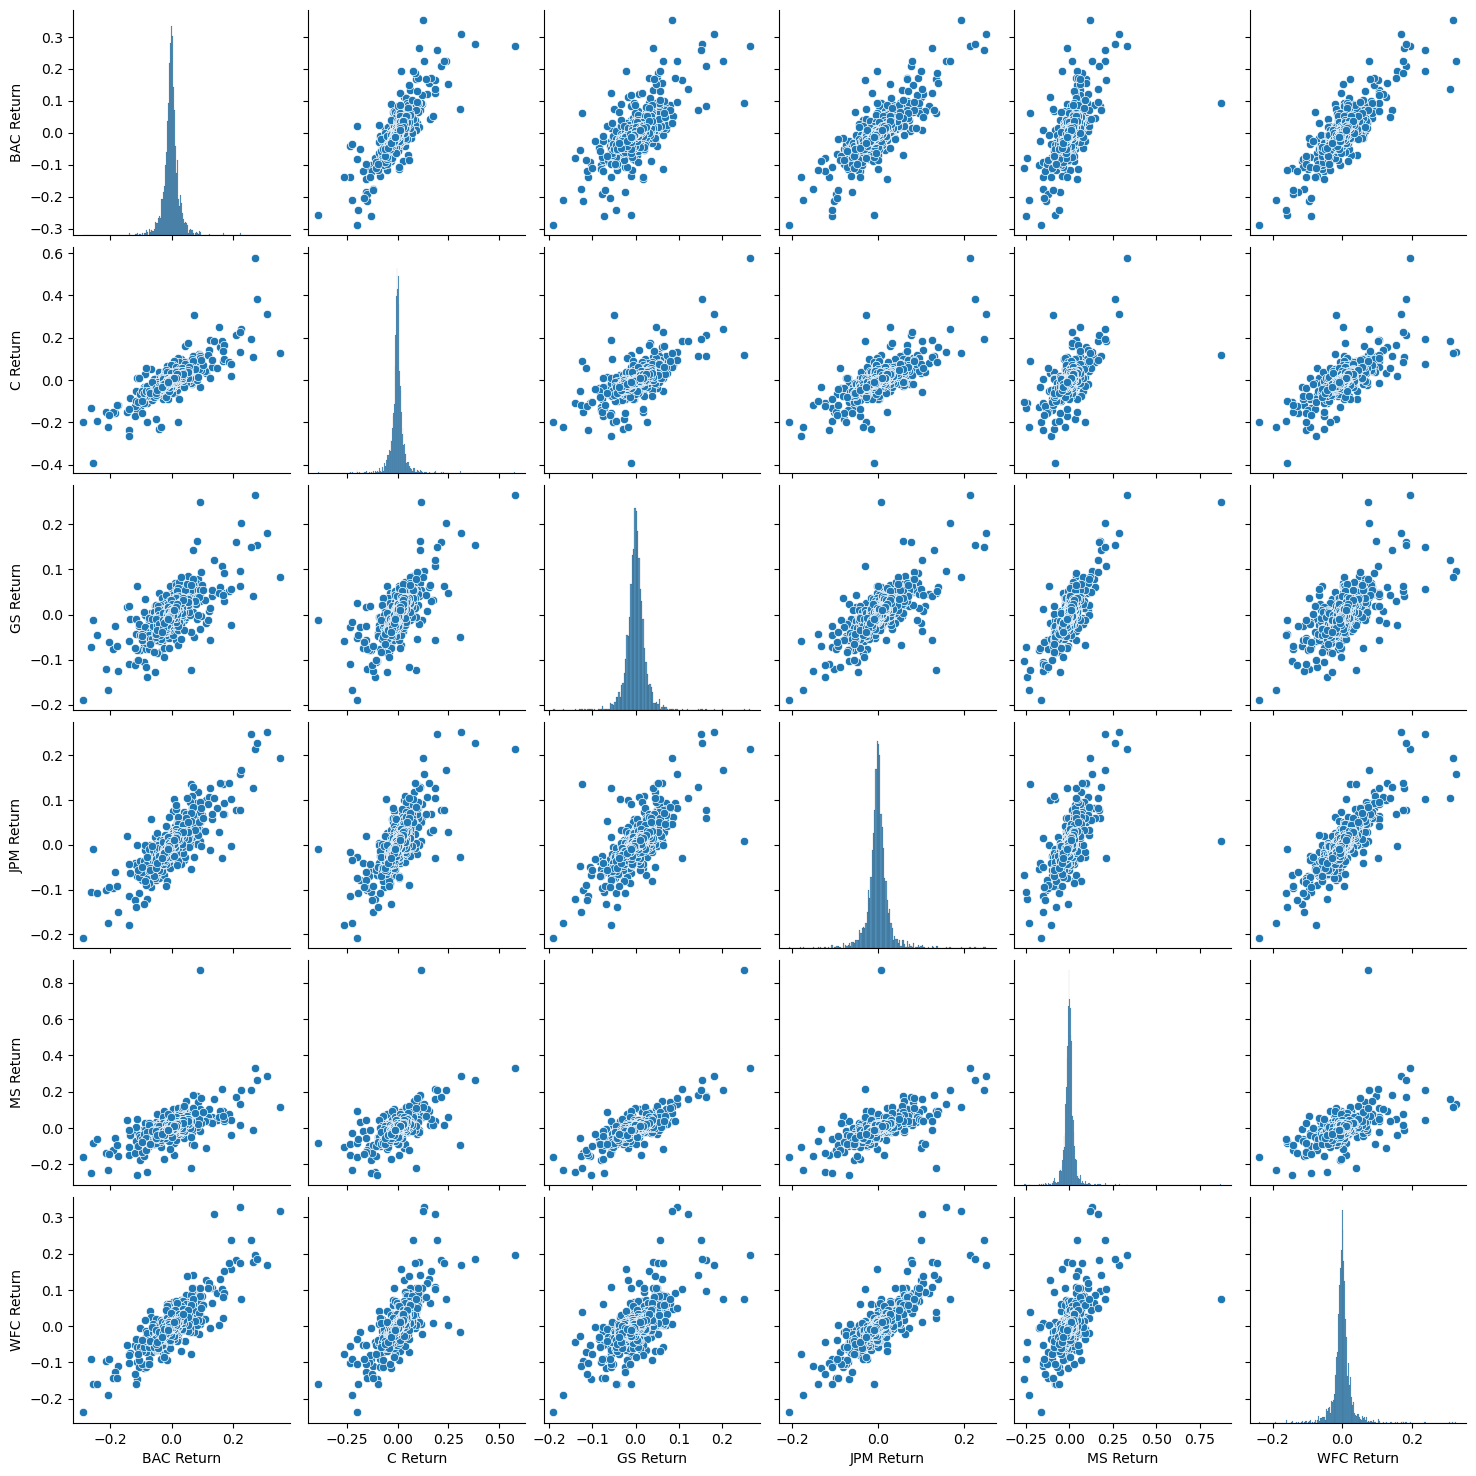

In [35]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(returns[1:])

In [41]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

# returns.loc['2009-02-27', 'C Return']

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [42]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [43]:
# riskiest stock - use std dev
returns.std()

#citibank

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [45]:
#riskiest for the year 2015
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/var/folders/b5/89nc1ktx2q3811mbrt9q9lrh0000gn/T/ipykernel_8212/1960598734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


<Axes: xlabel='MS Return', ylabel='Density'>

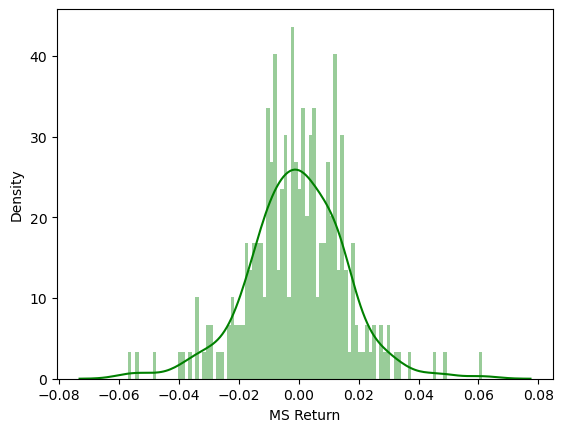

In [49]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

In [52]:
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()

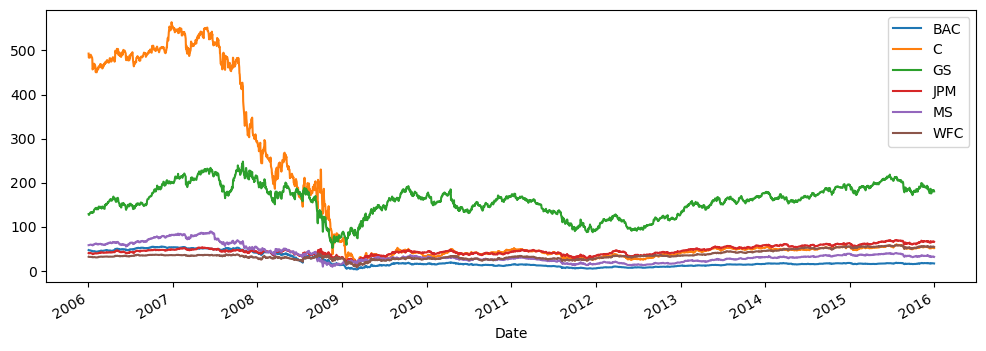

In [53]:
#Plot: Close price for each bank for the entire timeframe
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

# notice the steep drop in the citibank graph - risky
# the fluctualtions in the Goldman Sachs (GS) plot incidate that GS has experienced larger swings. 
# This can indicate higher levels of risk and uncertainty associated with the stock.

### Let's analyze the moving averages for these stocks in the year 2008.

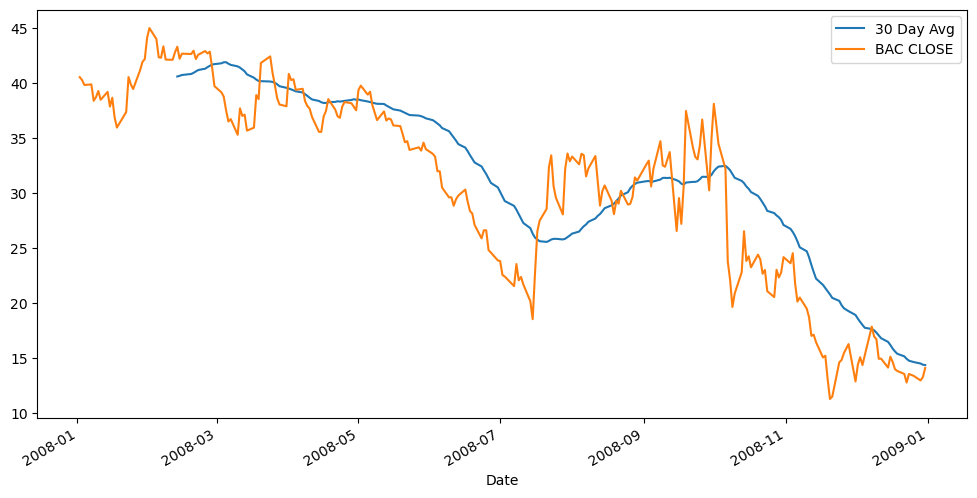

In [55]:
#  Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

# Technical Analysis

In [56]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')


# purpose: visualize the price movements of a stock over time
# green: increased ; red: decreased
# long: significant price movement, short: relatively small price change

In [60]:
# Simple Moving Averages plot of Morgan Stanley for the year 2015.

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

# > Shorter-term SMA (13): It tends to be more responsive to recent price movements and can provide signals for shorter-term trading decisions.

# > Intermediate-term SMA (21): Provides broader view of the stock's price movement.

# > Longer-term SMA (e.g., 55): Identify broader patterns and can be useful for long-term investors who are interested in the overall trend of the stock's price over several months or even years.

#### In this graph:
> I identified a bullish trend up until August. This could indicate positive market sentiment, increased buying pressure, and potential opportunities for traders or investors.

> Resistence during September - bearish trend. It suggests that the stock's price encountered a level where selling pressure was significant enough to prevent further upward movement. This resistance level may have acted as a barrier and caused a reversal or a bearish trend.

>More spacing between SMA lines in september period indicates higher volatility.Higher volatility can present both opportunities and risks for traders, as it may lead to larger potential gains but also increased potential losses

In [58]:
# Bollinger Band Plot for Bank of America for the year 2015

BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

The purpose of plotting Bollinger Bands is to analyze the volatility and potential price reversals in a stock's price movement. Bollinger Bands consist of three lines: the middle band, which is a simple moving average (SMA), and an upper band and lower band, which are typically set at a certain number of standard deviations away from the middle band.

> In july the stock's price touches the upper band. It may indicate an overbought condition.

> In September the stock's price touches the lower band. It would have indicated an oversold condition but instead of reversing and moving upwards, it went down.

# Thanks :) 
- Alyona